In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
base =  pd.read_csv('AirPassengers.csv')

In [9]:
base.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [11]:
dateParse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ["Month"], 
                   index_col= "Month", date_parser= dateParse)

In [12]:
base.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
#serie temporal
ts = base['#Passengers']

In [14]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

/home/cleano/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


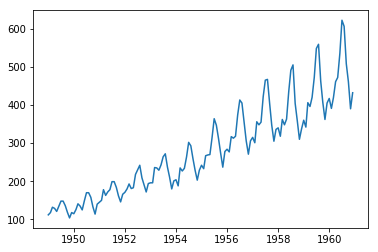

In [15]:
plt.plot(ts)

In [16]:
decomposicao = seasonal_decompose(ts)

In [19]:
tendencia = decomposicao.trend

In [22]:
tendencia.head(10)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: #Passengers, dtype: float64

In [23]:
sozanal = decomposicao.seasonal

In [24]:
sozanal.head()

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
Name: #Passengers, dtype: float64

In [25]:
aleatorio = decomposicao.resid

In [26]:
aleatorio.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

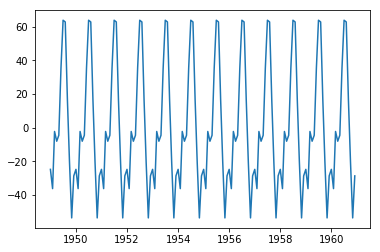

In [27]:
plt.plot(sozanal)

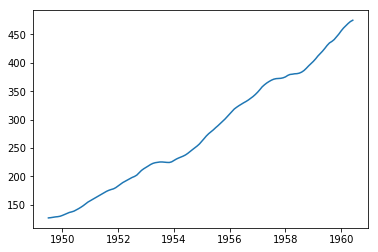

In [28]:
plt.plot(tedencia)

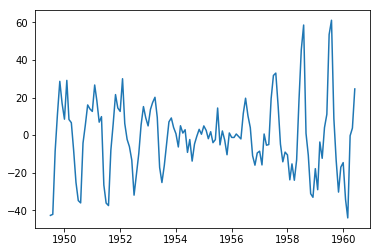

In [29]:
plt.plot(aleatorio)

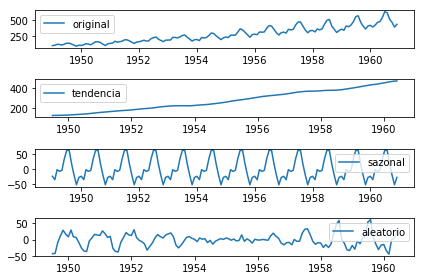

In [34]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label = 'tendencia')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sozanal, label = 'sazonal')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'aleatorio')
plt.legend(loc = 'best')

plt.tight_layout()